In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# cek versi tf, harus > 2
# print(tf.__version__)

# donlot dataset
# !wget --no-check-certificate \
#   https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
#   -O /tmp/messy_vs_clean_room.zip

# mengekstraksi data  /
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# mendefinisikan nama direktori untuk data latih dan data validasi 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [5]:
# melihat struktur data
os.listdir('/tmp/images/val')

['messy', 'clean']

In [6]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')
 
# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [7]:
# augmentasi gambar pada setiap sampel di dataset
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [8]:
# mempersiapkan data latih yang akan dipelajari oleh model
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [9]:
# membangun arsitektur sebuah CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
# memanggil fungsi compile pada objek model, dan tentukan loss function serta optimizer
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
# melatih model kita menggunakan metode fit. 
# Image data generator secara otomatis melabeli sebuah gambar sesuai dengan direktori di mana ia disimpan.
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)


Epoch 1/20
25/25 - 6s - loss: 0.7219 - accuracy: 0.5000 - val_loss: 0.7052 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.6958 - accuracy: 0.4900 - val_loss: 0.6910 - val_accuracy: 0.7500
Epoch 3/20
25/25 - 6s - loss: 0.6979 - accuracy: 0.4300 - val_loss: 0.6929 - val_accuracy: 0.6000
Epoch 4/20
25/25 - 6s - loss: 0.6937 - accuracy: 0.5400 - val_loss: 0.6873 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 6s - loss: 0.6935 - accuracy: 0.5400 - val_loss: 0.6919 - val_accuracy: 0.5500
Epoch 6/20
25/25 - 6s - loss: 0.6967 - accuracy: 0.5100 - val_loss: 0.6835 - val_accuracy: 0.5500
Epoch 7/20
25/25 - 6s - loss: 0.6750 - accuracy: 0.5900 - val_loss: 0.6343 - val_accuracy: 0.5500
Epoch 8/20
25/25 - 6s - loss: 0.6956 - accuracy: 0.6000 - val_loss: 0.6711 - val_accuracy: 0.5500
Epoch 9/20
25/25 - 6s - loss: 0.6221 - accuracy: 0.6900 - val_loss: 0.4656 - val_accuracy: 0.7000
Epoch 10/20
25/25 - 6s - loss: 0.6436 - accuracy: 0.6000 - val_loss: 0.6619 - val_accuracy: 0.5000
Epoch 11/20
25/25 -

Using TensorFlow backend.


Saving messyclean.jpg to messyclean.jpg
messyclean.jpg
messy


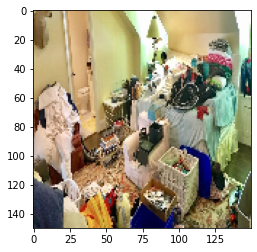

In [12]:
# secara interaktif memilih sebuah berkas gambar, 
# kemudian melakukan resize gambar dan mengubahnya menjadi larik numpy
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')